# Imports

In [6]:
import torch
import os
from matplotlib import pyplot as plt
import numpy as np


# Functions

In [91]:
def count_folders(directory):
    """Count the number of folders in the specified directory."""
    if not os.path.exists(directory):
        return "Directory does not exist."

    folder_count = 0
    for entry in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, entry)):
            folder_count += 1

    return folder_count



def show_data(path, nr_of_clients, specific_label):
    # Loop through each client's data
    for i in range(1, nr_of_clients + 1):
        # Construct the file path
        file = f"{path}/{i}/mnist.pt"

        # Load the file
        data = torch.load(file)

        print(f"\nClient {i}:")

        # Display three images with the specific label
        display_random_images(data["x_train"], data["y_train"], specific_label)
        

def display_random_images(images, labels, label_to_find):
    # Find indexes with the desired label
    indexes = [i for i, label in enumerate(labels) if label.item() == label_to_find]

    # If less than 3 images with the desired label are found, adjust the number of images to display
    num_images_to_display = min(3, len(indexes))

    if num_images_to_display == 0:
        print(f"No images found with label {label_to_find}")
        return

    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(5 * num_images_to_display, 5))

    # Display each image
    for i in range(num_images_to_display):
        ax = axes[i] if num_images_to_display > 1 else axes
        img = images[indexes[i]].numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Label: {label_to_find}')
        ax.axis('off')

    plt.show()
    
    
def add_backdoor_to_image(image):
    """
    Adds a small white plus sign in the top left corner of the image.

    :param image: The input image tensor.
    :return: Modified image tensor.
    """
    # Assuming the image is a 28x28 grayscale image
    # The plus sign will be 3 pixels tall and wide
    # Vertical part of the plus sign
    image[0:3, 1] = 255
    # Horizontal part of the plus sign
    image[1, 0:3] = 255
    return image


def backdoor_attack(path, target_label, fraction):
    clients_dir = os.path.join(path, 'clients')
    backdoor_clients_dir = os.path.join(path, 'backdoor_clients')

    num_folders = count_folders(clients_dir)
    num_backdoor_folders = int(fraction * num_folders)

    if not os.path.exists(backdoor_clients_dir):
        os.makedirs(backdoor_clients_dir)

    if not os.path.exists(clients_dir):
        return "Clients directory does not exist."

    # Sorting the folders numerically
    folders = sorted(os.listdir(clients_dir), key=lambda x: int(x) if x.isdigit() else x)

    i = 0
    for folder in folders:
        folder_path = os.path.join(clients_dir, folder)

        if os.path.isdir(folder_path):
            mnist_file = os.path.join(folder_path, 'mnist.pt')

            apply_backdoor = i < num_backdoor_folders
            if os.path.isfile(mnist_file):
                data = torch.load(mnist_file)

                if apply_backdoor:
                    x_train_backdoor = np.array(data['x_train'])
                    y_train = np.array(data['y_train'])

                    for j in range(len(x_train_backdoor)):
                        if y_train[j] == target_label:
                            x_train_backdoor[j] = add_backdoor_to_image(x_train_backdoor[j])

                    data['x_train'] = torch.tensor(x_train_backdoor)

                backdoor_subdir = os.path.join(backdoor_clients_dir, folder)
                if not os.path.exists(backdoor_subdir):
                    os.makedirs(backdoor_subdir)

                backdoor_file_path = os.path.join(backdoor_subdir, 'mnist.pt')
                torch.save(data, backdoor_file_path)

        i += 1


# Baseline


Client 1:


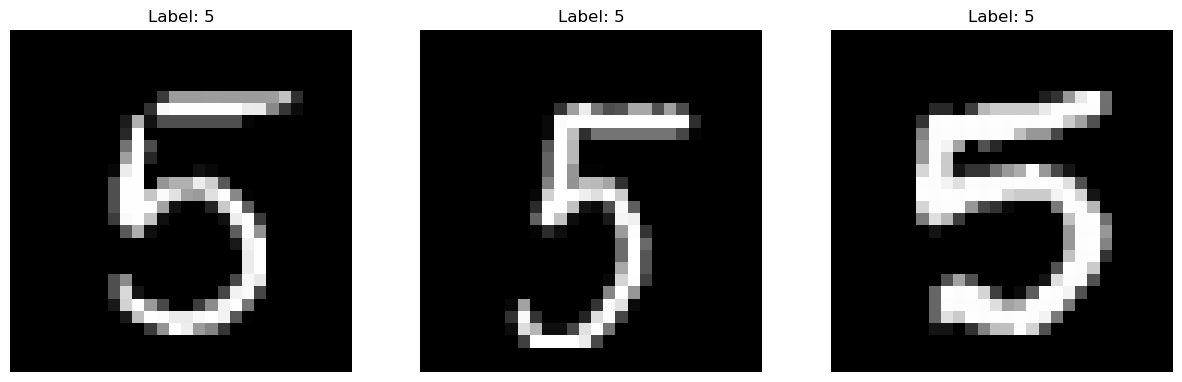


Client 2:


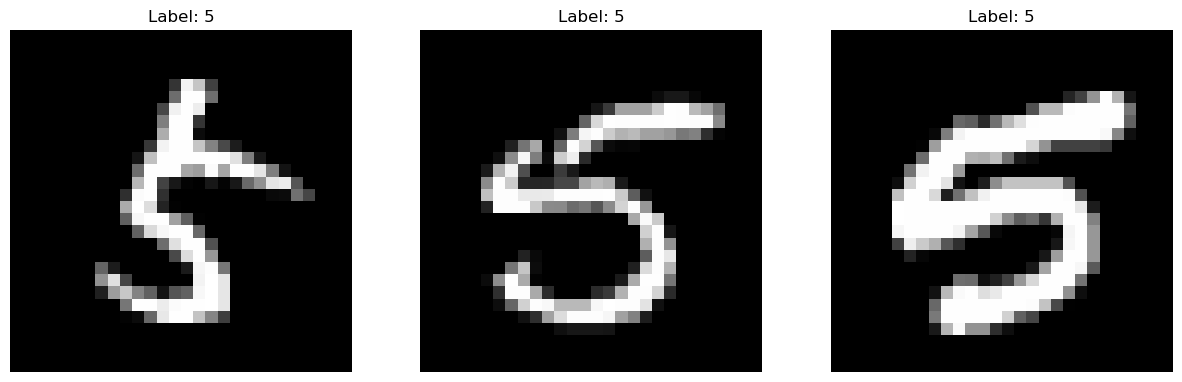


Client 3:


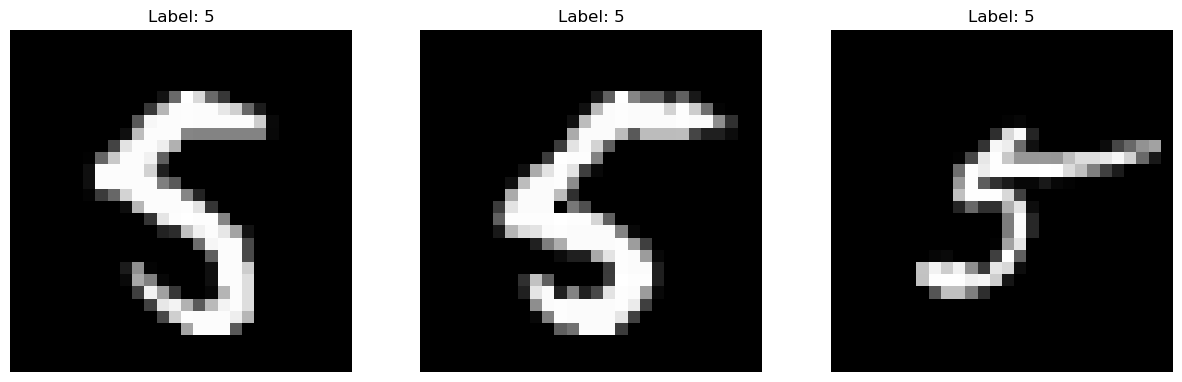


Client 4:


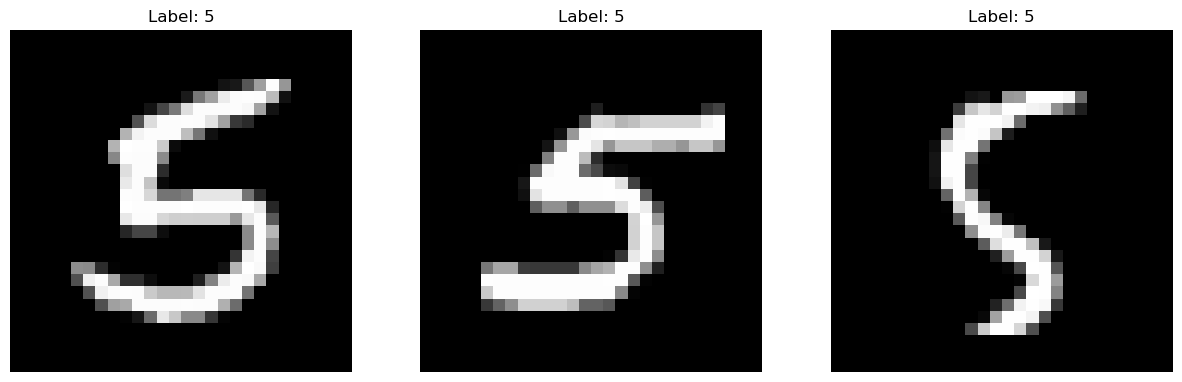


Client 5:


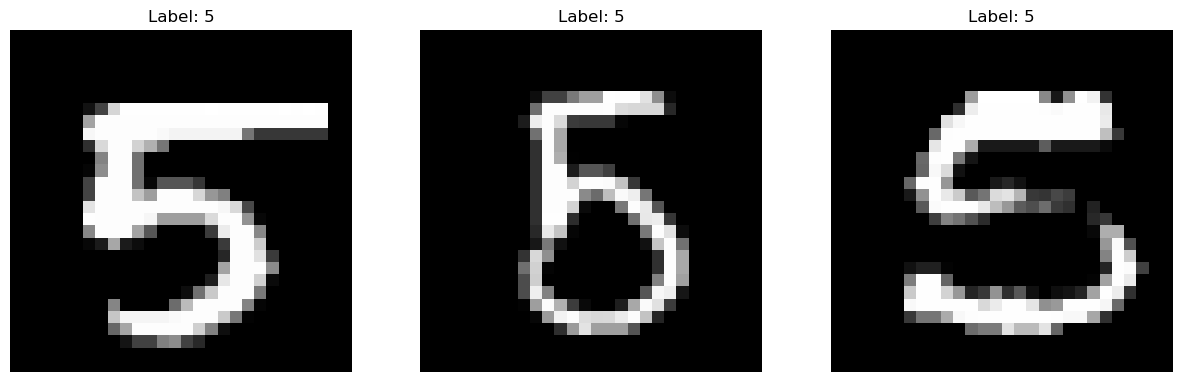


Client 6:


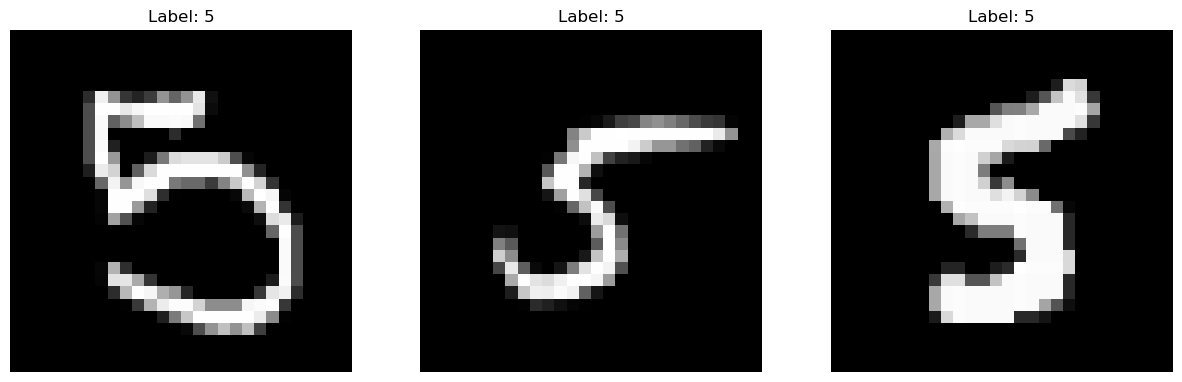


Client 7:


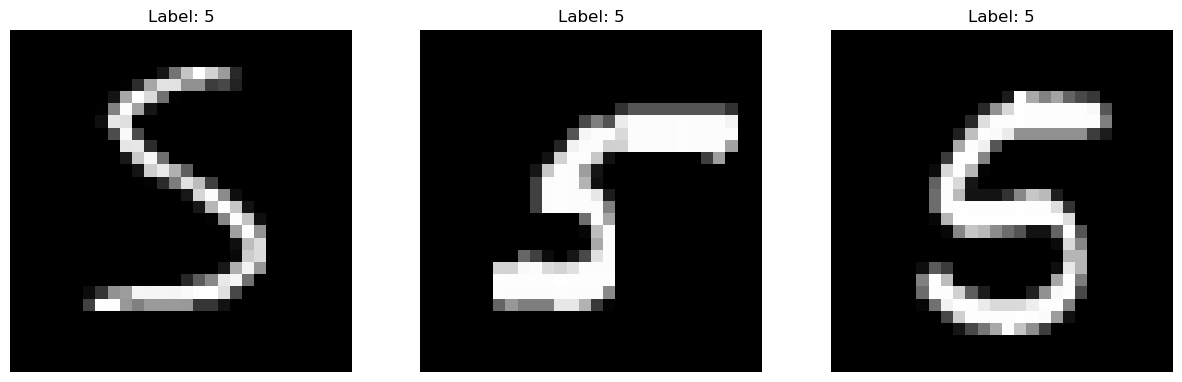


Client 8:


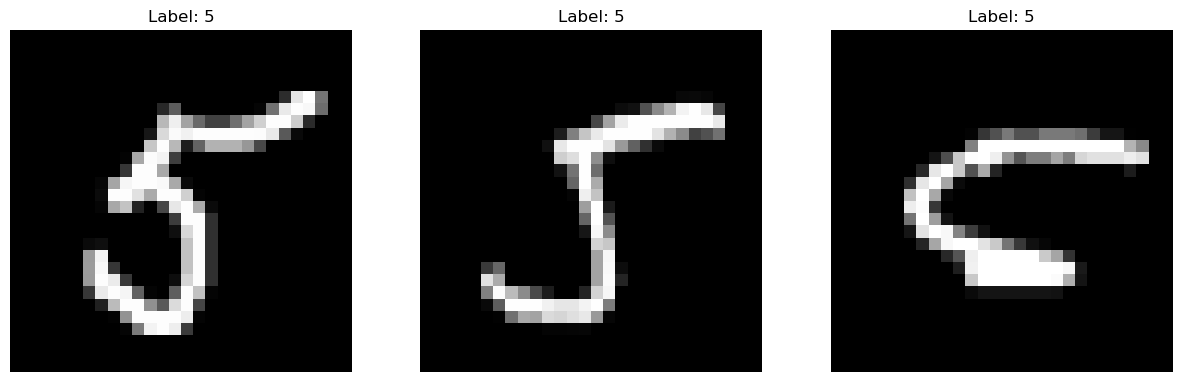


Client 9:


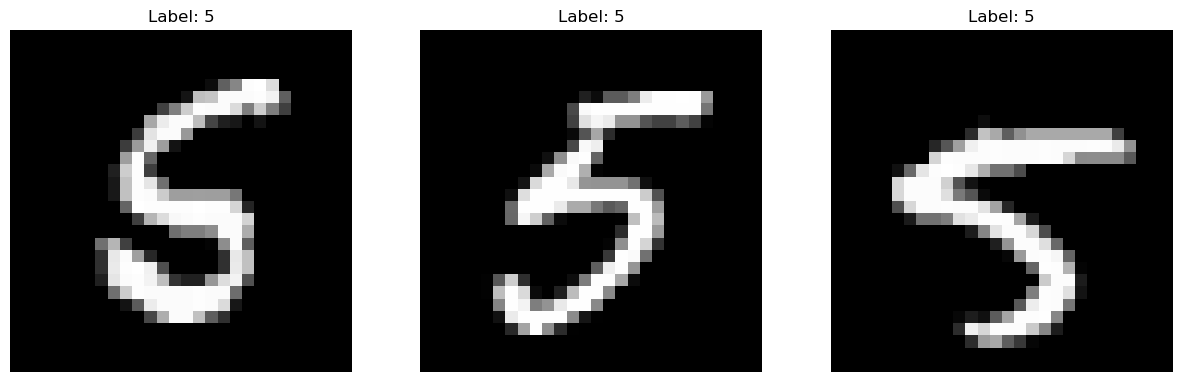


Client 10:


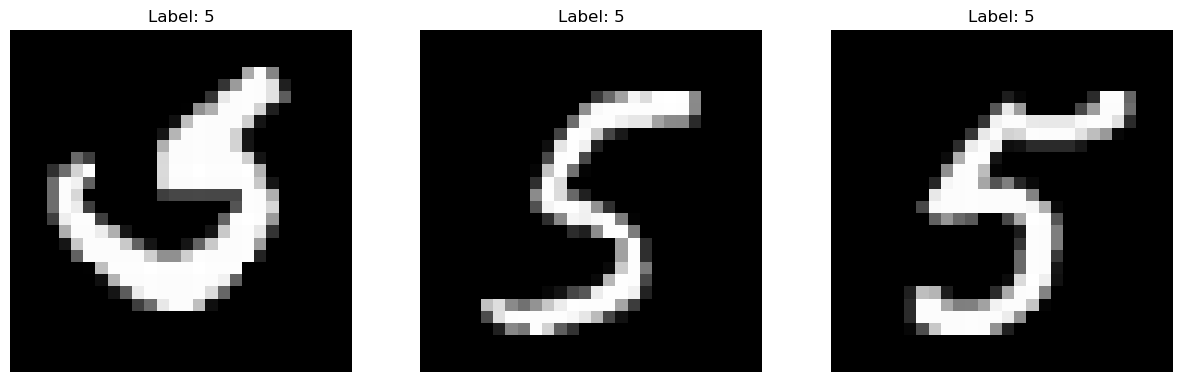

In [92]:
path1 = '../data/clients'
nr_of_clients = count_folders(path1)
show_data(path1,nr_of_clients, specific_label=5)

# Do backdoor attack

In [93]:
path2 = '../data'
backdoor_attack(path2,5,0.)

# Compare output


Client 1:


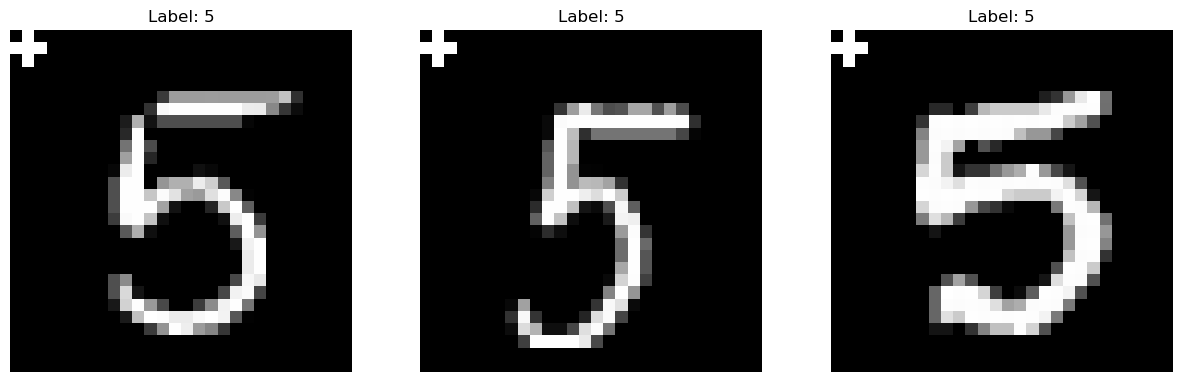


Client 2:


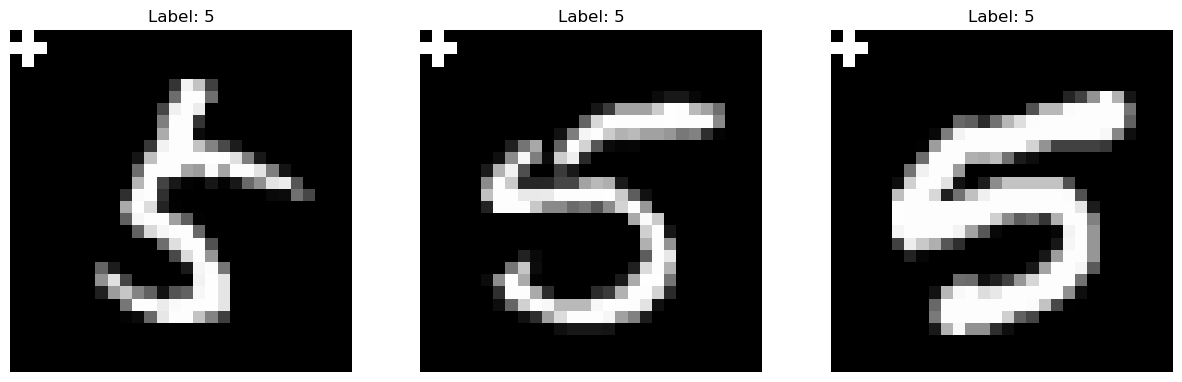


Client 3:


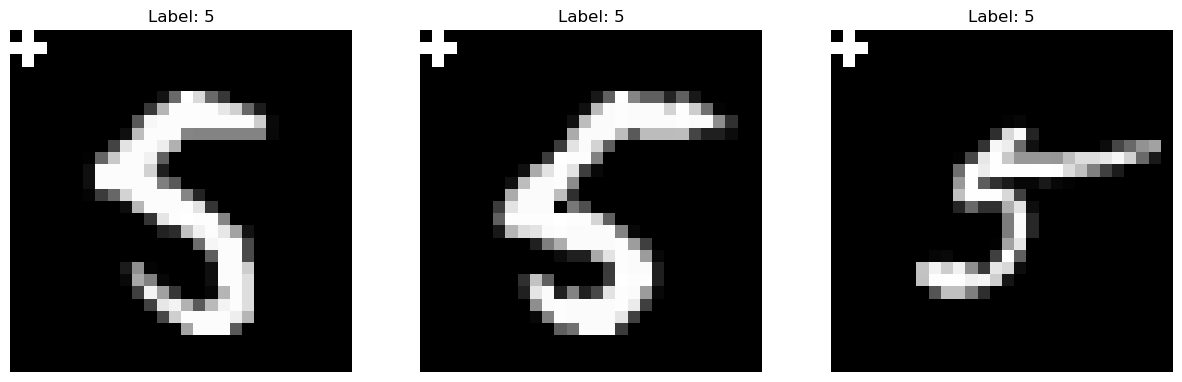


Client 4:


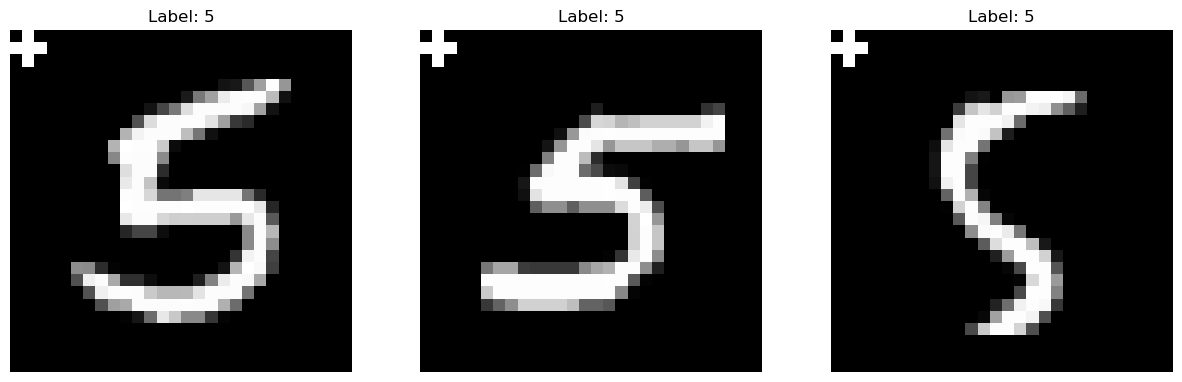


Client 5:


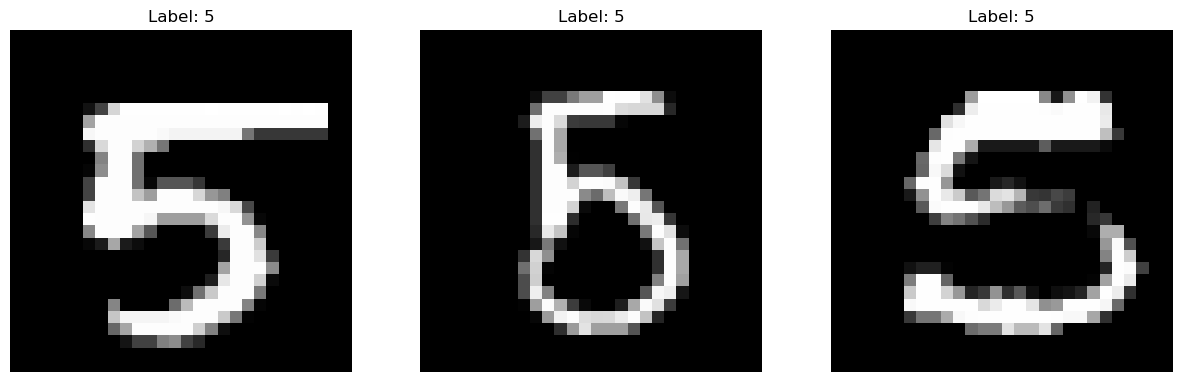


Client 6:


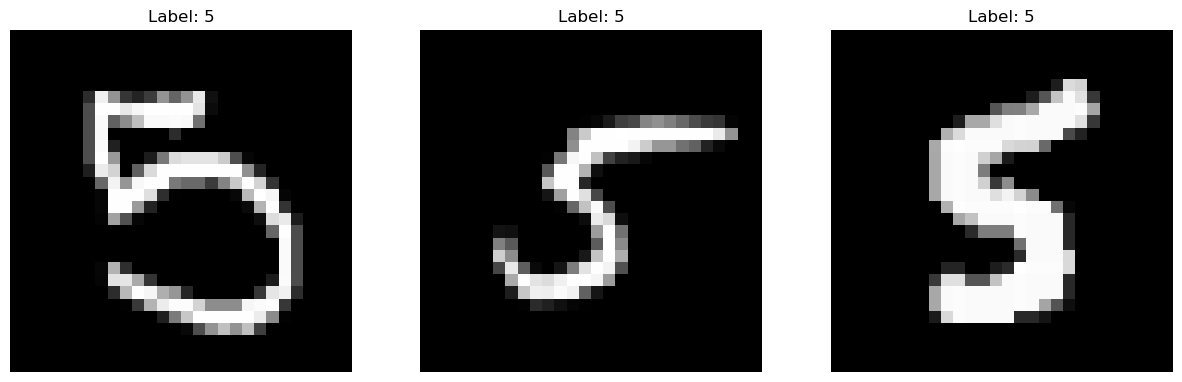


Client 7:


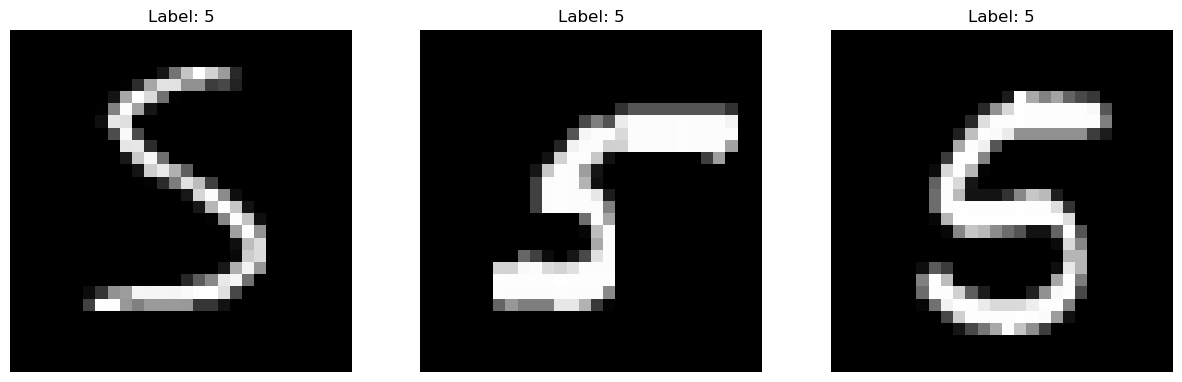


Client 8:


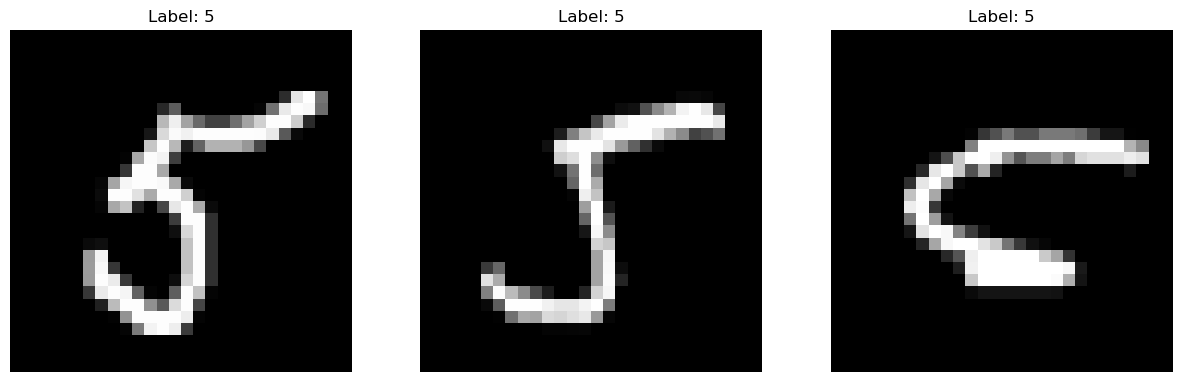


Client 9:


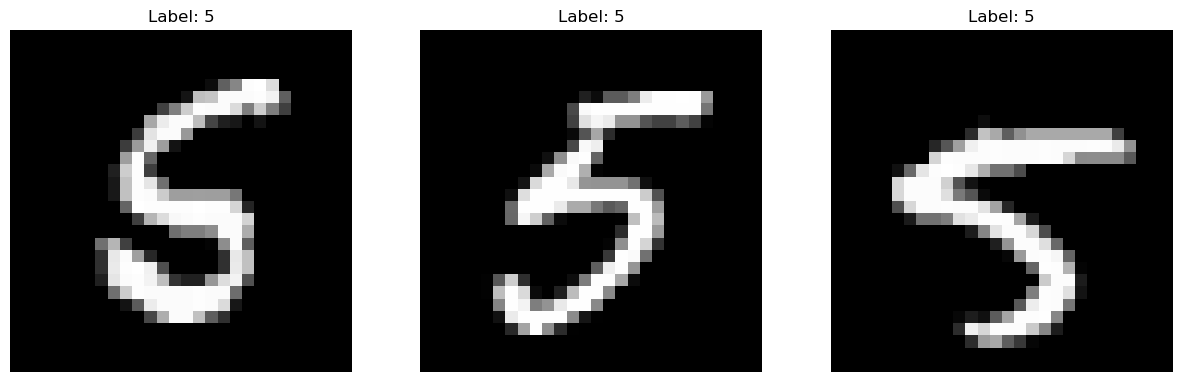


Client 10:


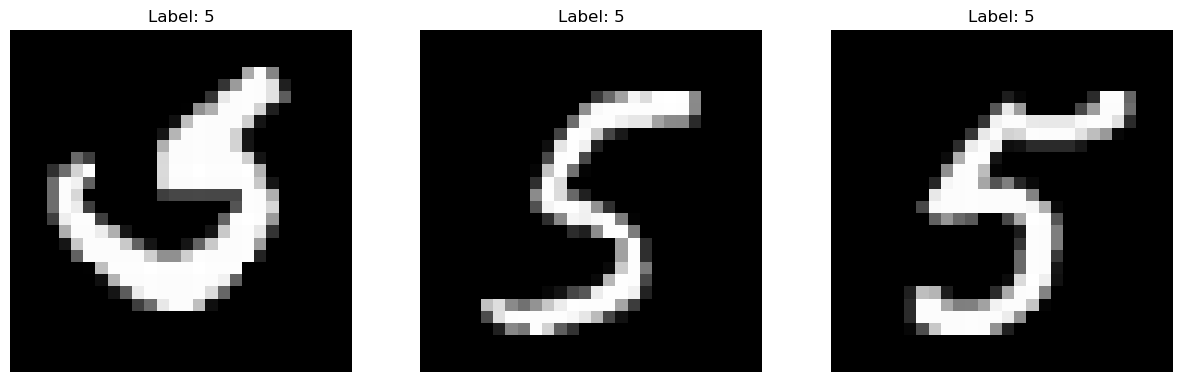

In [94]:
path2 = '../data/backdoor_clients'
nr_of_clients = count_folders(path2)
show_data(path2,nr_of_clients, specific_label=5)